In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from lib.DataWriter import DataWriter
INTERSECTION_HUMAN = {
    0: 'Fourway',
    1: 'Traffic lights',
    2: 'Equivalent',
    3: 'Smart lights'
}
INTERSECTION_COLOR = {
    0: 'b',
    1: 'c',
    2: 'g',
    3: 'r'
}

def get_parameters(p_spawn=0.1, max_speed_horizontal=10, max_speed_vertical=10, intersection_type=0):
    t_traffic_light_cycle=50
    p_bend = 0.33
    p_u_turn = 0.01
    p_left = p_bend
    p_right = p_bend
    p_straight = p_bend
    t_from_north = t_traffic_light_cycle
    t_from_west = t_traffic_light_cycle
    t_from_east = t_traffic_light_cycle
    t_from_south = t_traffic_light_cycle

    intersection_type = int(intersection_type)
    intersections = ['Fourway', 'Traffic lights', 'Equivalent', 'Smart lights']
    intersection = intersections[intersection_type]

    parameters = {
        "max_speed_horizontal": max_speed_horizontal,
        "max_speed_vertical": max_speed_vertical,
        "bmw_fraction": 0.1,
        "seed": 1337,
        "intersection_type": intersection,
        "t_from_north": t_from_north,
        "t_from_west": t_from_west,
        "t_from_east": t_from_east,
        "t_from_south": t_from_south,
        "p_car_spawn_north": p_spawn,
        "p_north_to_north": p_u_turn,
        "p_north_to_west": p_right,
        "p_north_to_east": p_left,
        "p_north_to_south": p_straight,
        "p_car_spawn_west": p_spawn,
        "p_west_to_north": p_left,
        "p_west_to_west": p_u_turn,
        "p_west_to_east": p_straight,
        "p_west_to_south": p_right,
        "p_car_spawn_east": p_spawn,
        "p_east_to_north": p_right,
        "p_east_to_west": p_straight,
        "p_east_to_east": p_u_turn,
        "p_east_to_south": p_left,
        "p_car_spawn_south": p_spawn,
        "p_south_to_north": p_straight,
        "p_south_to_west": p_left,
        "p_south_to_east": p_right,
        "p_south_to_south": p_u_turn,
    }
    return parameters

def get_mean_last_runs(dataset, i):
    n = len(dataset)
    k = n - i
    return float(dataset[-1] * n - dataset[k] * k) / float(i)

def get_time_till_convergence(dataset):
    epsilon = 0.01
    x_n = max(dataset)
    for k, x_0 in enumerate(dataset):
        if abs(x_n - x_0) < epsilon:
            return k

In [2]:
def throughput_vs_maximal_speed(**kwargs):
    p_spawn = kwargs['p_spawn']
    datawriter = DataWriter()
    for intersection_type in [0, 1, 2, 3]:
        for p in range(1, 11):
            p_spawn = p / 10.0
            throughput = []
            maximal_speed = []
            for max_speed in range(3, 24):
                max_speed_horizontal = max_speed_vertical = max_speed
                parameters = get_parameters(p_spawn, max_speed_horizontal, max_speed_vertical, intersection_type)
                data = datawriter.get_runs_by_parameters(parameters)
                throughput.append(get_mean_last_runs(data['results']['throughput'], 900))
                
                maximal_speed.append((data['parameters']['max_speed_vertical'] + data['parameters']['max_speed_horizontal']) / 2.0)
            plt.scatter(maximal_speed, throughput, color=INTERSECTION_COLOR[intersection_type], alpha=0.1)
#     plt.legend()
    plt.xlabel('Maximal speed')
    plt.ylabel('Throughput')
    plt.ylim((0, 0.25))
    plt.show()
    
def mean_crossover_vs_maximal_speed(**kwargs):
    p_spawn = kwargs['p_spawn']
    datawriter = DataWriter()
    for intersection_type in [0, 1, 2, 3]:
        mean_crossover = []
        maximal_speed = []
        for max_speed in range(3, 24):
            max_speed_horizontal = max_speed_vertical = max_speed
            parameters = get_parameters(p_spawn, max_speed_horizontal, max_speed_vertical, intersection_type)
            data = datawriter.get_runs_by_parameters(parameters)
            mean_crossover.append(data['results']['mean_crossover_time'][-1])
            maximal_speed.append((data['parameters']['max_speed_vertical'] + data['parameters']['max_speed_horizontal']) / 2.0)
        plt.scatter(maximal_speed, mean_crossover, label=INTERSECTION_HUMAN[intersection_type])
#     plt.legend()
    plt.xlabel('Maximal speed')
    plt.ylabel('Mean crossover time')
    plt.show()
    
def throughput_vs_p_spawn(**kwargs):
    max_speed_horizontal = kwargs['max_speed_horizontal']
    max_speed_vertical = kwargs['max_speed_vertical']
    datawriter = DataWriter()
    for intersection_type in [0, 1, 2, 3]:
        throughput = []
        p_spawn = []
        for p in range(1, 10):
            p = p / 10.0
            parameters = get_parameters(p, max_speed_horizontal, max_speed_vertical, intersection_type)
            data = datawriter.get_runs_by_parameters(parameters)
            p_spawn.append(p)
            throughput.append(data['results']['throughput'][-1])
        plt.scatter(p_spawn, throughput, label=INTERSECTION_HUMAN[intersection_type])
#     plt.legend()
    plt.xlabel('Spawning probability')
    plt.ylabel('Throughput')
    plt.show()
    
def mean_crossover_vs_p_spawn(**kwargs):
    max_speed_horizontal = kwargs['max_speed_horizontal']
    max_speed_vertical = kwargs['max_speed_vertical']
    datawriter = DataWriter()
    for intersection_type in [0, 1, 2, 3]:
        mean_crossover = []
        p_spawn = []
        for p in range(1, 10):
            p = p / 10.0
            parameters = get_parameters(p, max_speed_horizontal, max_speed_vertical, intersection_type)
            data = datawriter.get_runs_by_parameters(parameters)
            p_spawn.append(p)
            mean_crossover.append(data['results']['mean_crossover_time'][-1])
        plt.scatter(p_spawn, mean_crossover, label=INTERSECTION_HUMAN[intersection_type])
#     plt.legend()
    plt.xlabel('Spawning probability')
    plt.ylabel('Mean crossover time')
    plt.show()
    
def convergence_vs_maximal_speed(**kwargs):
    p_spawn = kwargs['p_spawn']
    datawriter = DataWriter()
    for intersection_type in [0, 1, 2, 3]:
        for p in range(1, 11):
            p_spawn = p / 10.0
            convergence = []
            maximal_speed = []
            for max_speed in range(3, 24):
                max_speed_horizontal = max_speed_vertical = max_speed
                parameters = get_parameters(p_spawn, max_speed_horizontal, max_speed_vertical, intersection_type)
                data = datawriter.get_runs_by_parameters(parameters)
                convergence.append(get_time_till_convergence(data['results']['throughput']))
                maximal_speed.append((data['parameters']['max_speed_vertical'] + data['parameters']['max_speed_horizontal']) / 2.0)
            plt.scatter(maximal_speed, convergence, color=INTERSECTION_COLOR[intersection_type], alpha=0.1)
    plt.xlabel('Maximal speed')
    plt.ylabel('Time until convergence')
    plt.show()

def convergence_vs_p_spawn(**kwargs):
    p_spawn = kwargs['p_spawn']
    datawriter = DataWriter()
    for intersection_type in [0, 1, 2, 3]:
        for max_speed in range(3, 24):
            max_speed_horizontal = max_speed_vertical = max_speed
            convergence = []
            p_spawn_list = []
            for p in range(1, 11):
                p_spawn = p / 10.0
                parameters = get_parameters(p_spawn, max_speed_horizontal, max_speed_vertical, intersection_type)
                data = datawriter.get_runs_by_parameters(parameters)
                convergence.append(get_time_till_convergence(data['results']['throughput']))
                p_spawn_list.append(p_spawn)
            plt.scatter(p_spawn_list, convergence, color=INTERSECTION_COLOR[intersection_type], alpha=0.1)
    plt.xlabel('Spawn probability')
    plt.ylabel('Time until convergence')
    plt.show()

Inserted run with id 431
Inserted run with id 432
Inserted run with id 433
Inserted run with id 434
Inserted run with id 435
Inserted run with id 436
Inserted run with id 437
Inserted run with id 438
Inserted run with id 439
Inserted run with id 440
Inserted run with id 441
Inserted run with id 442
Inserted run with id 443
Inserted run with id 444
Inserted run with id 445
Inserted run with id 446
Inserted run with id 447
Inserted run with id 448
Inserted run with id 449
Inserted run with id 450
Inserted run with id 451
Inserted run with id 452
Inserted run with id 453
Inserted run with id 454
Inserted run with id 455
Inserted run with id 456
Inserted run with id 457
Inserted run with id 458
Inserted run with id 459
Inserted run with id 460
Inserted run with id 461
Inserted run with id 462
Inserted run with id 463
Inserted run with id 464
Inserted run with id 465
Inserted run with id 466
Inserted run with id 467
Inserted run with id 468
Inserted run with id 469
Inserted run with id 470


Inserted run with id 759
Inserted run with id 760
Inserted run with id 761
Inserted run with id 762
Inserted run with id 763
Inserted run with id 764
Inserted run with id 765
Inserted run with id 766
Inserted run with id 767
Inserted run with id 768
Inserted run with id 769
Inserted run with id 770
Inserted run with id 771
Inserted run with id 772
Inserted run with id 773
Inserted run with id 774
Inserted run with id 775
Inserted run with id 776
Inserted run with id 777
Inserted run with id 778
Inserted run with id 779
Inserted run with id 780
Inserted run with id 781
Inserted run with id 782
Inserted run with id 783
Inserted run with id 784
Inserted run with id 785
Inserted run with id 786
Inserted run with id 787
Inserted run with id 788
Inserted run with id 789
Inserted run with id 790
Inserted run with id 791
Inserted run with id 792
Inserted run with id 793
Inserted run with id 794
Inserted run with id 795
Inserted run with id 796
Inserted run with id 797
Inserted run with id 798


Inserted run with id 1084
Inserted run with id 1085
Inserted run with id 1086
Inserted run with id 1087
Inserted run with id 1088
Inserted run with id 1089
Inserted run with id 1090
Inserted run with id 1091
Inserted run with id 1092
Inserted run with id 1093
Inserted run with id 1094
Inserted run with id 1095
Inserted run with id 1096
Inserted run with id 1097
Inserted run with id 1098
Inserted run with id 1099
Inserted run with id 1100
Inserted run with id 1101
Inserted run with id 1102
Inserted run with id 1103
Inserted run with id 1104
Inserted run with id 1105
Inserted run with id 1106
Inserted run with id 1107
Inserted run with id 1108
Inserted run with id 1109
Inserted run with id 1110
Inserted run with id 1111
Inserted run with id 1112
Inserted run with id 1113
Inserted run with id 1114
Inserted run with id 1115
Inserted run with id 1116
Inserted run with id 1117
Inserted run with id 1118
Inserted run with id 1119
Inserted run with id 1120
Inserted run with id 1121
Inserted run

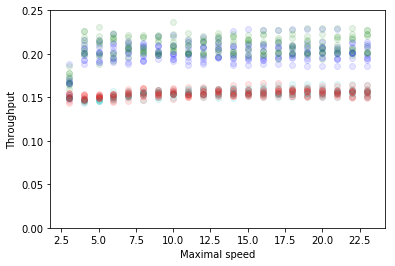

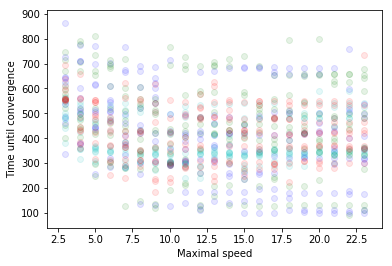

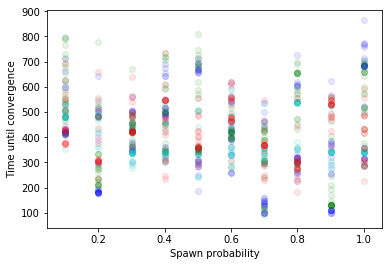

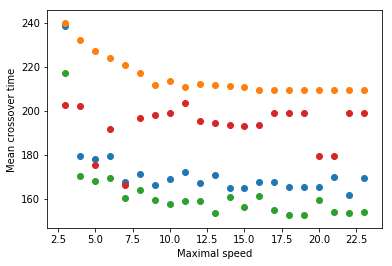

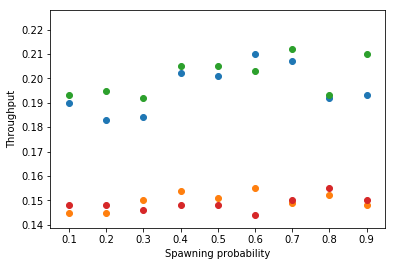

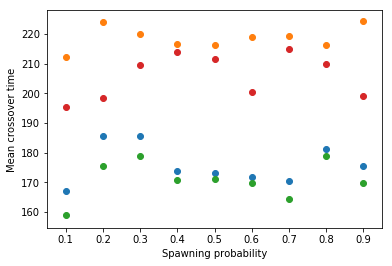

In [4]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
    
def plots_1(**kwargs):
    throughput_vs_maximal_speed(**kwargs)
    convergence_vs_maximal_speed(**kwargs)
    convergence_vs_p_spawn(**kwargs)
    mean_crossover_vs_maximal_speed(**kwargs)
    throughput_vs_p_spawn(**kwargs)
    mean_crossover_vs_p_spawn(**kwargs)
    
plots_1(p_spawn=0.1, max_speed_horizontal=12, max_speed_vertical=12)

y=-0.793939393939394x+-0.5333333333333332 with R^2=0.7133474664338862


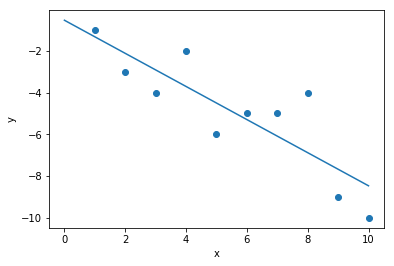

In [3]:
# Fit line to data

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = -1 * np.array([1, 3, 4, 2, 6, 5, 5, 4, 9, 10]).reshape(-1, 1)

# create a linear regression model
model = LinearRegression()
model.fit(x, y)
a = model.coef_
b = model.intercept_
R2 = model.score(x, y)
print("y={}x+{} with R^2={}".format(a[0][0], b[0], R2))

# predict y from the data
x_new = np.linspace(0, 10, 100)
y_new = model.predict(x_new[:, np.newaxis])

# plot the results
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

In [ ]:
interact(plots_1, p_spawn=(0.1, 1, 0.1), max_speed_horizontal=(3, 24), max_speed_vertical=(3, 24))

Text(0, 0.5, 'Count')

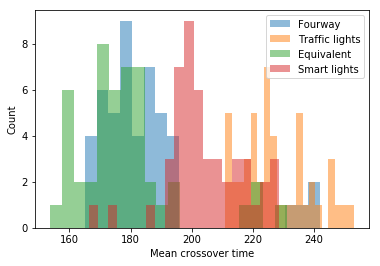

In [5]:
# Histograms
# set some parameters :
speeds = range(3, 15)
p_spawn=[0.1,0.3, 0.6,0.9]

cross_dict = {}

for intersection in INTERSECTION_HUMAN.keys():
    mean_crossover_per_intersection = []
    for speed in speeds:
        for p in p_spawn:
            parameters = get_parameters(p, speed, speed, intersection)
            datawriter = DataWriter()
            data = datawriter.get_runs_by_parameters(parameters)
            mean_crossover_per_intersection.append(data['results']['mean_crossover_time'][-1])
    cross_dict[intersection] = mean_crossover_per_intersection

for key in cross_dict.keys():
    plt.hist(cross_dict[key],bins = 20, label = INTERSECTION_HUMAN[key], alpha = .5)
plt.legend()
plt.xlabel('Mean crossover time')
plt.ylabel('Count')

AttributeError: 'dict' object has no attribute 'index'

/home/roland/.local/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


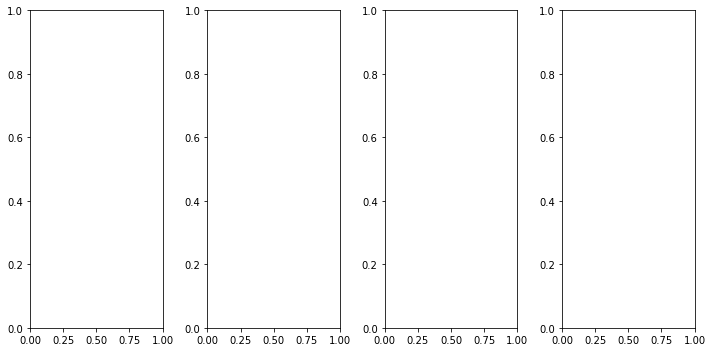

In [11]:
fig, axs = plt.subplots(1, 4, figsize = (10,5), sharey=False, tight_layout=True)

for key in cross_dict.keys():
    ind = cross_dict.index(key)
    axs[ind].hist(cross_dict[key], bins = 15, label = INTERSECTION_HUMAN[key], alpha = .5)
    axs[ind].set_title(INTERSECTION_HUMAN[key])
    axs[ind].set_ylabel('Frequency')
    axs[ind].set_xlabel('Mean crossover time')